In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pickle
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
pd.set_option("display.max_columns",500)

## 화재강도 예측

In [2]:
train1 = pd.read_csv("건물별_화재강도_train.csv",encoding='utf-8-sig',engine='python')
train1 = train1.drop(['시군구명','동리명','관리건축물대장PK','시군구명.1','법정동코드2'],1)

In [3]:
# 결측치찾기
train1.isnull().sum()

대지면적(㎡)             0
건축면적(㎡)             0
연면적(㎡)              0
구조코드명               0
주용도코드명              0
높이(m)               0
지상층수                0
지하층수                0
승용승강기수              0
비상용승강기수             0
빌딩연차                0
기타용도                0
공동주택                0
공장                  0
단독주택                0
문화및집회시설             0
숙박시설                0
업무시설                0
위험물저장및처리시설          0
제1종근린생활시설           0
제2종근린생활시설           0
창고시설                0
면적                  0
휴게음식점               0
일반음식점               0
제과점                 0
단란주점                0
유흥주점                0
사업체수                0
숙박 및 음식점업 사업체수      0
RN_COUNT            0
RN_COUNT_under4     0
ROAD_BT_MEAN        0
RN_length_under4    0
RN_length_under3    0
RN_COUNT_under3     0
RN_length_under2    0
RN_COUNT_under2     0
RN_under4_rate      0
RN_under3_rate      0
RN_under2_rate      0
비상소화장치_count        0
소화용수_count          0
가판대_count           0
공영주차장수              0
주차 면(주차 가능

In [26]:
# 결측치 -> 0 으로 대체
train1.fillna(0,inplace=True)

### y변수 EDA

In [4]:
# y변수 통계값 도출
train1['재산피해소계'].describe()

count     423.000000
mean      195.957447
std       327.845831
min         0.000000
25%        20.000000
50%        50.000000
75%       203.000000
max      1569.000000
Name: 재산피해소계, dtype: float64

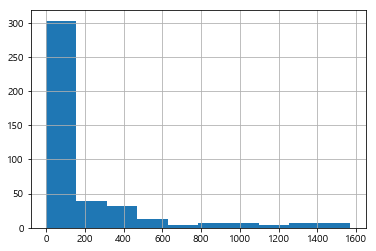

In [5]:
train1['재산피해소계'].hist()

In [6]:
len(train1)

423

In [7]:
train1.describe()

,대지면적(㎡),건축면적(㎡),연면적(㎡),높이(m),지상층수,지하층수,승용승강기수,비상용승강기수,빌딩연차,공동주택,공장,단독주택,문화및집회시설,숙박시설,업무시설,위험물저장및처리시설,제1종근린생활시설,제2종근린생활시설,창고시설,면적,휴게음식점,일반음식점,제과점,단란주점,유흥주점,사업체수,숙박 및 음식점업 사업체수,RN_COUNT,RN_COUNT_under4,ROAD_BT_MEAN,RN_length_under4,RN_length_under3,RN_COUNT_under3,RN_length_under2,RN_COUNT_under2,RN_under4_rate,RN_under3_rate,RN_under2_rate,비상소화장치_count,소화용수_count,가판대_count,공영주차장수,주차 면(주차 가능 차량 수),건물수,소방서거리(㎞),안전센터거리,부동산,동산,재산피해소계,관할인구(명),관할면적(km2)
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.00000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,421.000000,421.000000,423.000000,423.000000,423.000000
mean,1029.756917,345.443002,3292.400520,12.723080,5.910165,0.834515,0.423168,0.085106,23.531915,1332.534474,18.79824,2892.525397,3.470705,22.046580,64.370313,5.561175,453.456445,405.542312,10.133412,1.667058,76.161454,300.736923,9.575752,7.147906,4.765062,1989.356232,327.187568,607.997742,220.626031,5.423627,641.026517,623.372067,102.443246,821.689090,27.108670,0.345319,0.152626,0.039941,16.409066,515.925678,4.705317,7.572162,85.911989,5239.317583,3.398582,1.629787,74.912114,121.976247,195.957447,104289.683215,5.982695
std,5213.940494,985.419369,13259.543421,18.219838,6.074300,0.646566,1.724683,0.453883,11.939948,1216.061562,55.79173,2580.067881,3.536854,32.454895,88.965155,3.861309,340.559487,369.575535,12.133724,1.440343,68.431015,238.716419,6.833238,7.895599,7.898015,1558.607731,246.017535,531.452346,268.979960,1.680225,1747.011214,1562.654102,153.556499,2891.124982,52.962947,0.202120,0.123248,0.058377,21.466024,369.148672,6.104505,6.705597,51.978964,4276.052700,1.716507,0.847501,196.101296,204.863600,327.845831,35880.840941,3.657147
min,0.000000,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.684783,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,15.600000,16.400000,0.000000,0.266667,20.333333,84.750000,2.500000,0.000000,0.000000,557.000000,105.000000,19.652778,0.000000,2.592041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.600000,0.000000,0.000000,0.000000,108.463043,0.200000,0.100000,0.000000,0.000000,0.000000,9957.000000,1.500000
25%,0.000000,78.075000,234.090000,0.000000,2.000000,0.500000,0.000000,0.000000,16.000000,447.000000,1.00000,830.458333,1.000000,3.000000,14.166667,2.500000,175.000000,179.000000,3.000000,0.960000,46.616667,198.125000,6.000000,3.000000,0.000000,1288.000000,225.000000,219.375000,67.000000,4.163973,56.044776,41.180723,19.000000,31.632000,1.750000,0.204334,0.054104,0.006010,4.000000,218.000000,1.000000,2.583333,60.187748,2190.000000,2.200000,1.000000,0.000000,20.000000,20.000000,81912.000000,3.530000
50%,133.500000,121.880000,491.360000,9.400000,4.000000,1.000000,0.000000,0.000000,24.000000,1001.000000,3.00000,2077.000000,3.000000,7.000000,31.900000,5.400000,372.000000,334.000000,6.000000,1.110000,57.500000,241.500000,7.625000,5.000000,2.000000,1589.500000,270.000000,384.000000,116.708333,5.172294,85.930707,73.839966,45.000000,58.319149,8.000000,0.345361,0.114983,0.018868,10.000000,394.000000,3.000000,5.250000,73.647059,4352.625000,3.200000,1.500000,0.000000,38.000000,50.000000,100403.000000,5.130000
75%,240.265000,285.005000,1297.960000,14.250000,5.000000,1.000000,0.000000,0.000000,29.500000,1688.000000,8.00000,4163.500000,4.937500,29.500000,70.000000,8.000000,721.071429,476.000000,11.750000,1.842222,80.333333,316.500000,10.666667,9.500000,5.000000,2012.000000,330.400000,934.500000,249.500000,6.340909,627.681838,400.342738,105.375000,552.000000,22.000000,0.482625,0.238366,0.044903,17.000000,817.200000,5.000000,11.000000,102.426136

### x변수 EDA

In [8]:
X1 = train1.drop(["부동산","동산","재산피해소계",'공동주택', '공장', '단독주택','연면적(㎡)','대지면적(㎡)',
       '문화및집회시설', '숙박시설', '업무시설', '위험물저장및처리시설', '제1종근린생활시설', '제2종근린생활시설',
       '창고시설', '면적', '휴게음식점', '일반음식점', '제과점', '단란주점', '유흥주점','구조코드명','RN_COUNT','주용도코드명',
       '숙박 및 음식점업 사업체수','승용승강기수','비상용승강기수','가판대_count','장소중분류','사업체수','건물수','기타용도','건물구조즙',
                 'RN_COUNT_under4','RN_COUNT_under3','RN_COUNT_under2'],1)
y1 = train1['재산피해소계']

In [9]:
X1.columns

Index(['건축면적(㎡)', '높이(m)', '지상층수', '지하층수', '빌딩연차', 'ROAD_BT_MEAN',
       'RN_length_under4', 'RN_length_under3', 'RN_length_under2',
       'RN_under4_rate', 'RN_under3_rate', 'RN_under2_rate', '비상소화장치_count',
       '소화용수_count', '공영주차장수', '주차 면(주차 가능 차량 수)', '건물구조조', '장소소분류',
       '소방서거리(㎞)', '안전센터거리', '관할인구(명)', '관할면적(km2)'],
      dtype='object')

In [10]:
X1['건물구조조'].value_counts()

철근콘크리트조    307
벽돌조         98
블록조          7
목조           6
기타 조         3
샌드위치패널조      1
치장벽돌조        1
Name: 건물구조조, dtype: int64

In [11]:
X1['장소소분류'].value_counts()

다가구주택                           107
다세대주택                           106
아파트                              87
단독주택                             56
연립주택                             25
상가주택(주택부분에서 화재가 발생한 경우에만 해당)     11
다중주택                              9
주상복합아파트                           5
기타 공동주택                           5
모텔                                3
호텔                                2
성당                                1
노인복지시설                            1
교회                                1
사회복지시설                            1
유치원                               1
기타 단독주택                           1
쇼핑센터                              1
Name: 장소소분류, dtype: int64

In [12]:
X1.describe()

,건축면적(㎡),높이(m),지상층수,지하층수,빌딩연차,ROAD_BT_MEAN,RN_length_under4,RN_length_under3,RN_length_under2,RN_under4_rate,RN_under3_rate,RN_under2_rate,비상소화장치_count,소화용수_count,공영주차장수,주차 면(주차 가능 차량 수),소방서거리(㎞),안전센터거리,관할인구(명),관할면적(km2)
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,345.443002,12.723080,5.910165,0.834515,23.531915,5.423627,641.026517,623.372067,821.689090,0.345319,0.152626,0.039941,16.409066,515.925678,7.572162,85.911989,3.398582,1.629787,104289.683215,5.982695
std,985.419369,18.219838,6.074300,0.646566,11.939948,1.680225,1747.011214,1562.654102,2891.124982,0.202120,0.123248,0.058377,21.466024,369.148672,6.705597,51.978964,1.716507,0.847501,35880.840941,3.657147
min,0.000000,0.000000,1.000000,0.000000,1.000000,2.592041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.600000,0.000000,0.000000,0.200000,0.100000,9957.000000,1.500000
25%,78.075000,0.000000,2.000000,0.500000,16.000000,4.163973,56.044776,41.180723,31.632000,0.204334,0.054104,0.006010,4.000000,218.000000,2.583333,60.187748,2.200000,1.000000,81912.000000,3.530000
50%,121.880000,9.400000,4.000000,1.000000,24.000000,5.172294,85.930707,73.839966,58.319149,0.345361,0.114983,0.018868,10.000000,394.000000,5.250000,73.647059,3.200000,1.500000,100403.000000,5.130000
75%,285.005000,14.250000,5.000000,1.000000,29.500000,6.340909,627.681838,400.342738,552.000000,0.482625,0.238366,0.044903,17.000000,817.200000,11.000000,102.426136,4.200000,2.100000,131158.000000,6.875000
max,11633.100000,150.600000,46.000000,6.000000,74.000000,19.372549,12314.328704,10515.666667,25215.000000,0.880000,0.651240,0.616529,109.000000,1691.000000,31.000000,401.000000,10.000000,7.000000,184449.000000,20.240000


c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


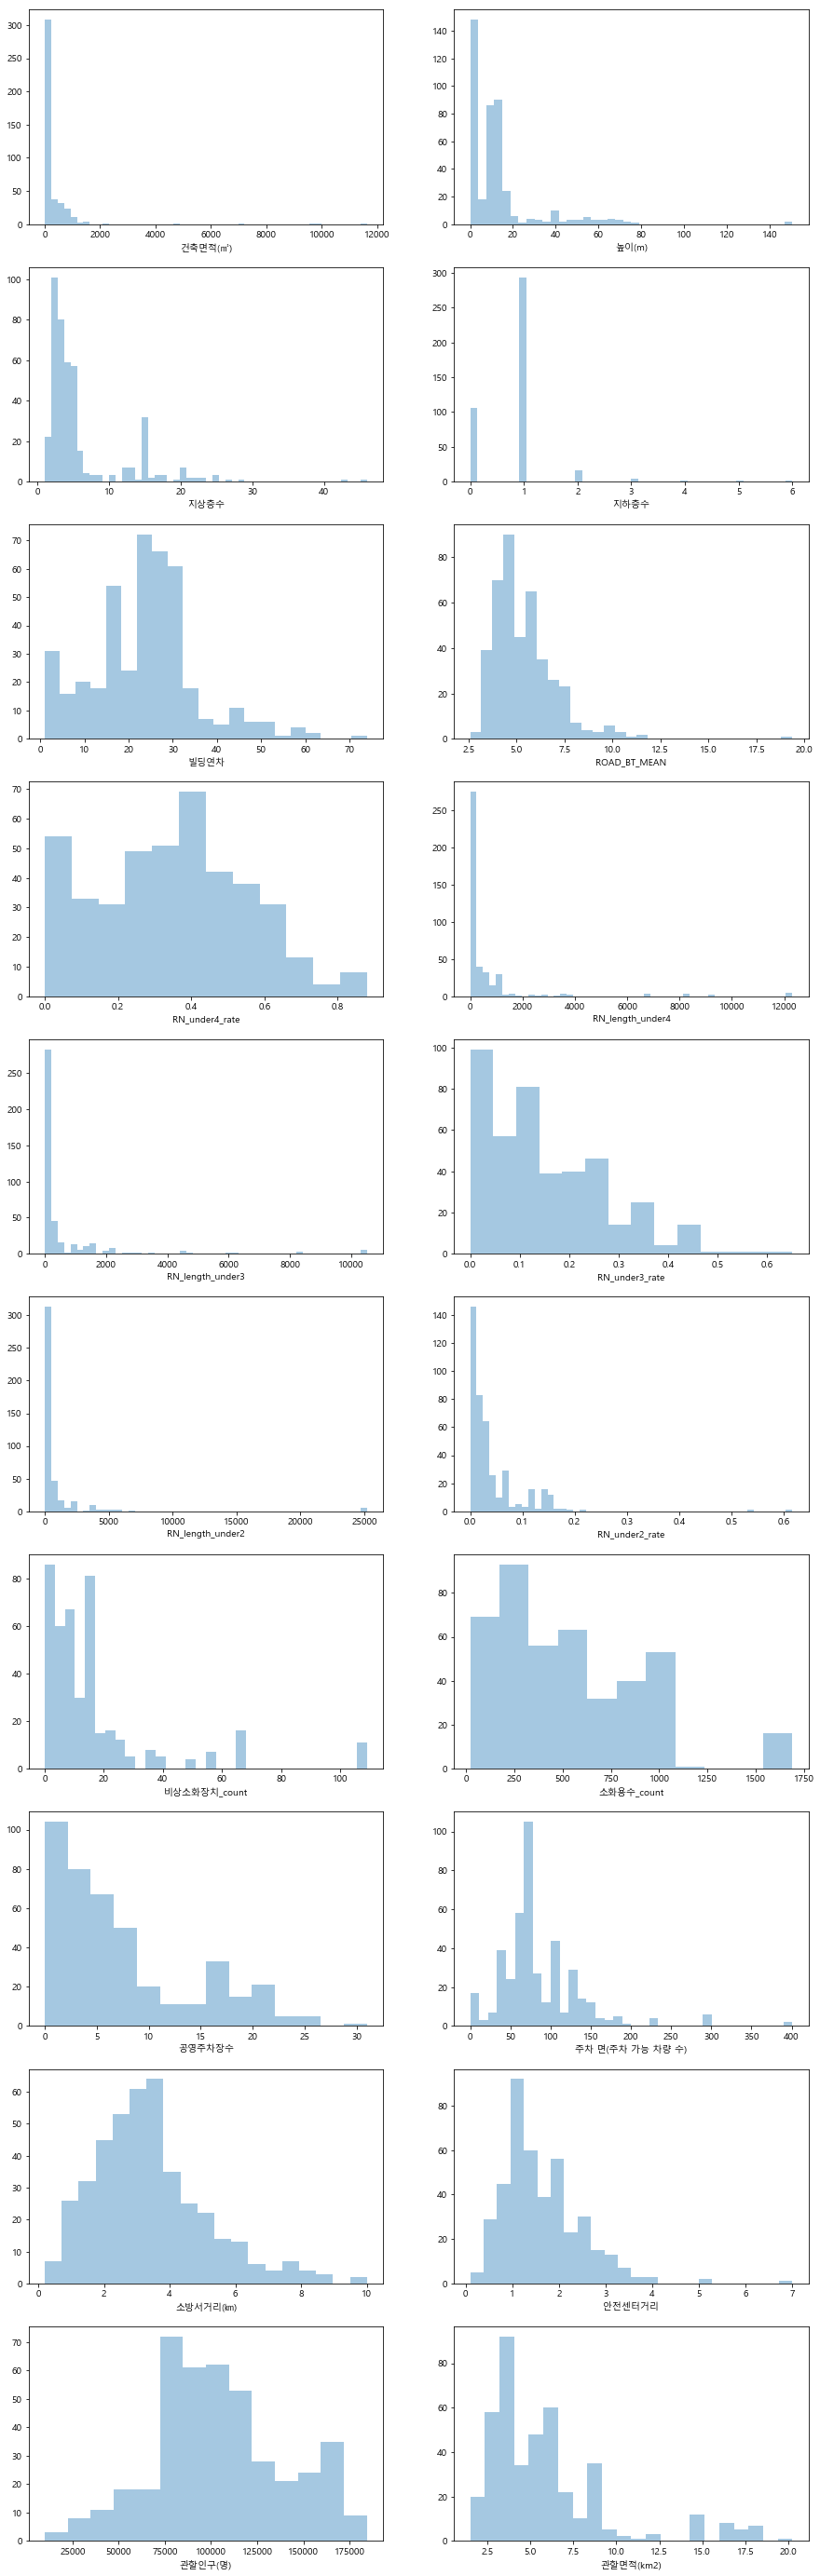

In [13]:
## ax=axes[0, 0] 는 위치
f, axes = plt.subplots(10, 2, figsize=(15, 50), sharex=False)
sns.distplot(X1["건축면적(㎡)"], ax=axes[0, 0],kde=False)
sns.distplot(X1["높이(m)"], ax=axes[0, 1],kde=False)

sns.distplot(X1["지상층수"],ax=axes[1, 0],kde=False)
sns.distplot(X1["지하층수"], ax=axes[1,1],kde=False)

sns.distplot(X1["빌딩연차"],ax=axes[2, 0],kde=False)
sns.distplot(X1["ROAD_BT_MEAN"], ax=axes[2, 1],kde=False)

sns.distplot(X1["RN_under4_rate"],ax=axes[3, 0],kde=False)
sns.distplot(X1["RN_length_under4"], ax=axes[3,1],kde=False)

sns.distplot(X1["RN_length_under3"], ax=axes[4, 0],kde=False)
sns.distplot(X1["RN_under3_rate"],ax=axes[4, 1],kde=False)

sns.distplot(X1["RN_length_under2"], ax=axes[5,0],kde=False)
sns.distplot(X1["RN_under2_rate"], ax=axes[5, 1],kde=False)

sns.distplot(X1["비상소화장치_count"],ax=axes[6, 0],kde=False)
sns.distplot(X1["소화용수_count"], ax=axes[6,1],kde=False)

sns.distplot(X1["공영주차장수"],ax=axes[7, 0],kde=False)
sns.distplot(X1["주차 면(주차 가능 차량 수)"], ax=axes[7,1],kde=False)

sns.distplot(X1["소방서거리(㎞)"],ax=axes[8, 0],kde=False)
sns.distplot(X1["안전센터거리"], ax=axes[8,1],kde=False)

sns.distplot(X1["관할인구(명)"],ax=axes[9, 0],kde=False)
sns.distplot(X1["관할면적(km2)"], ax=axes[9,1],kde=False)

plt.show()

In [13]:
X1['건물구조조'].value_counts()

철근콘크리트조    307
벽돌조         98
블록조          7
목조           6
기타 조         3
샌드위치패널조      1
치장벽돌조        1
Name: 건물구조조, dtype: int64

In [14]:
X1['장소소분류'].value_counts()

다가구주택                           107
다세대주택                           106
아파트                              87
단독주택                             56
연립주택                             25
상가주택(주택부분에서 화재가 발생한 경우에만 해당)     11
다중주택                              9
주상복합아파트                           5
기타 공동주택                           5
모텔                                3
호텔                                2
쇼핑센터                              1
유치원                               1
성당                                1
기타 단독주택                           1
교회                                1
사회복지시설                            1
노인복지시설                            1
Name: 장소소분류, dtype: int64

### 전처리 및 모델링

In [54]:
# 명목변수 encoding
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
X1['건물구조조'] = encoder1.fit_transform(X1[['건물구조조']])
X1['장소소분류'] = encoder2.fit_transform(X1[['장소소분류']])

c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
# train - test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3,shuffle=True)

In [72]:
print('=====================')
print("train set:",len(X_train))
print("test set:",len(X_test))
print('=====================')

train set: 296
test set: 127


In [73]:
rf1 = RandomForestRegressor(min_samples_split=60)
rf1.fit(X_train,y_train)
pred = rf1.predict(X_test)

c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [74]:
# RMSE
np.sqrt(mean_squared_error(y_test,pred))

261.571298302088

In [184]:
## 모델 저장
joblib.dump(rf1,"final_result/fire_intensity_model.pkl")

['final_result/fire_intensity_model.pkl']

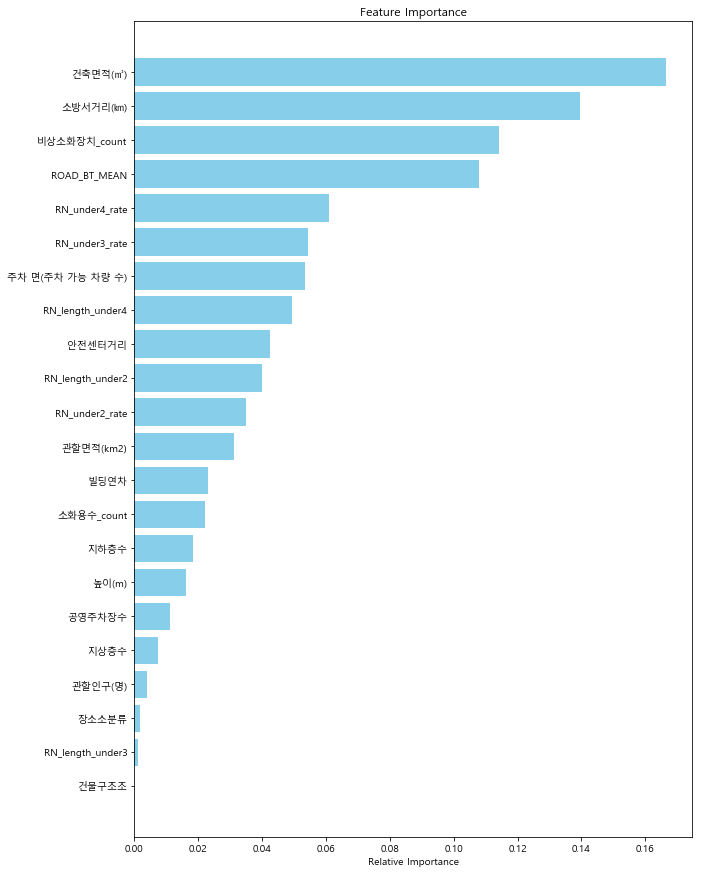

In [185]:
importances = rf1.feature_importances_
indices = np.argsort(importances)
features = X1.columns
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
## feature importance df로 만들기

In [159]:
feature_df = pd.DataFrame(features,columns=["features"])
importances_df = pd.DataFrame(importances,columns = ["importances"])

## 화재 빈도

In [35]:
train2 = pd.read_csv("건물별_화재빈도_train.csv",encoding='utf-8-sig',engine='python')
train2 = train2.drop(['시군구명','동리명','관리건축물대장PK','법정동코드2'],1)

In [36]:
train2.isnull().sum()

빌딩연차              0
기타용도              0
구조코드명             0
대지면적(㎡)           0
건축면적(㎡)           0
연면적(㎡)            0
주용도코드명            0
높이(m)             0
지상층수              0
지하층수              0
세대수(세대)           0
가구수(가구)           0
공동주택              0
공장                0
단독주택              0
문화및집회시설           0
숙박시설              0
업무시설              0
위험물저장및처리시설        0
제1종근린생활시설         0
제2종근린생활시설         0
창고시설              0
면적대비 생활인구 밀도      0
2018연간가스사용량       0
2018연간전기사용량       0
0-5 시간대 생활인구      0
6-11 시간대 생활인구     0
12-17 시간대 생활인구    0
18-23 시간대 생활인구    0
시간대별 생활인구 총합계     0
전체세대수             0
인구                0
인구밀도              0
전체평균연령            0
65세이상인구수          0
65세이상인구비율         0
휴게음식점             0
일반음식점             0
제과점               0
단란주점              0
유흥주점              0
사업체수              0
건물수               0
fire_YN           0
dtype: int64

### EDA

In [37]:
train2['fire_YN'].value_counts()

1    423
0    423
Name: fire_YN, dtype: int64

In [38]:
X2 = train2.drop(["fire_YN",'공동주택', '공장', '단독주택','연면적(㎡)',
       '문화및집회시설', '숙박시설', '업무시설', '위험물저장및처리시설', '제1종근린생활시설', '제2종근린생활시설',
       '창고시설','휴게음식점','일반음식점', '제과점', '단란주점', '유흥주점','전체평균연령',
        '0-5 시간대 생활인구','6-11 시간대 생활인구', '12-17 시간대 생활인구', '18-23 시간대 생활인구','대지면적(㎡)',
                  '65세이상인구수', '65세이상인구비율','전체세대수','가구수(가구)','기타용도','지상층수','지하층수'],1)
y2 = train2['fire_YN']

In [39]:
X2.columns

Index(['빌딩연차', '구조코드명', '건축면적(㎡)', '주용도코드명', '높이(m)', '세대수(세대)',
       '면적대비 생활인구 밀도', '2018연간가스사용량', '2018연간전기사용량', '시간대별 생활인구 총합계', '인구',
       '인구밀도', '사업체수', '건물수'],
      dtype='object')

In [40]:
X2.describe()

,빌딩연차,건축면적(㎡),높이(m),세대수(세대),면적대비 생활인구 밀도,2018연간가스사용량,2018연간전기사용량,시간대별 생활인구 총합계,인구,인구밀도,사업체수,건물수
count,846.000000,846.000000,846.000000,846.000000,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,846.000000,846.000000,846.000000,846.000000
mean,26.179669,240.484247,10.260689,17.641844,8.999833e+06,1.886228e+08,1.945660e+08,2.348424e+08,25571.540137,24238.455298,2092.941287,4689.819491
std,14.137478,730.504464,15.483528,53.288813,3.220880e+06,1.811836e+08,1.654086e+08,8.785672e+07,7647.951608,9311.668506,1732.180383,4029.546575
min,1.000000,0.000000,0.000000,0.000000,6.544901e+05,1.092214e+07,7.913295e+06,8.930000e+07,1901.000000,1474.000000,379.000000,47.666667
25%,16.000000,59.582500,0.000000,0.000000,6.811692e+06,9.037620e+07,8.429663e+07,1.840833e+08,21414.050000,18521.200000,1284.142857,1814.250000
50%,25.000000,95.110000,7.800000,0.000000,9.266151e+06,1.399019e+08,1.411546e+08,2.122000e+08,25543.800000,24786.666667,1589.500000,3346.000000
75%,33.000000,171.385000,13.000000,8.000000,1.114035e+07,2.051561e+08,2.650484e+08,2.583750e+08,29284.800000,31984.333333,2117.750000,6449.000000
max,88.000000,11633.100000,150.600000,645.000000,3.034420e+07,1.233228e+09,9.472883e+08,7.120000e+08,56487.000000,42773.000000,15851.000000,18231.000000


c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


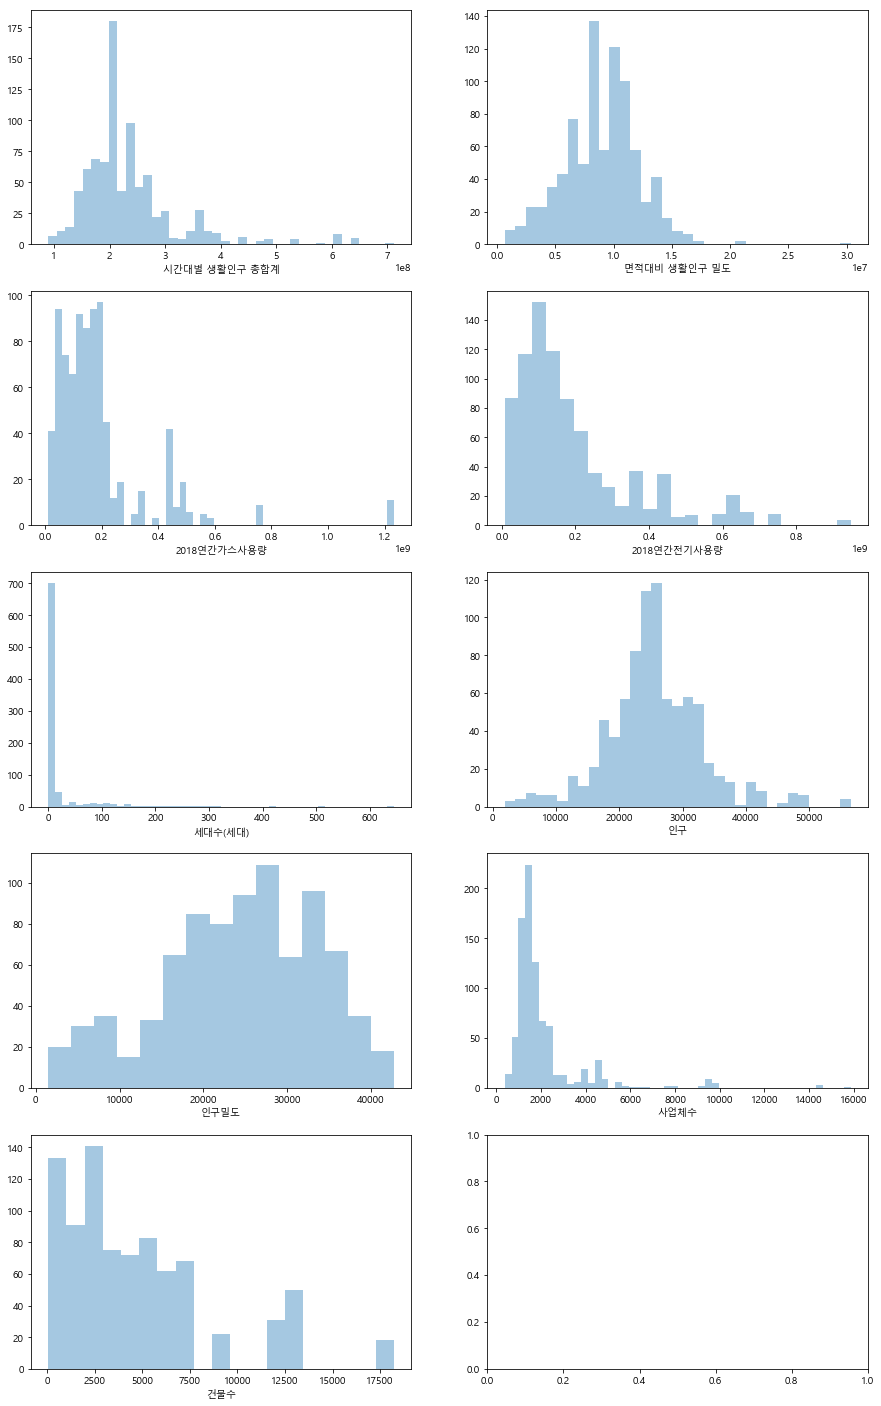

In [41]:
f, axes = plt.subplots(5, 2, figsize=(15, 25), sharex=False)
sns.distplot(X2["시간대별 생활인구 총합계"], ax=axes[0, 0],kde=False)
sns.distplot(X2["면적대비 생활인구 밀도"], ax=axes[0, 1],kde=False)

sns.distplot(X2["2018연간가스사용량"],ax=axes[1, 0],kde=False)
sns.distplot(X2["2018연간전기사용량"], ax=axes[1,1],kde=False)

sns.distplot(X2["세대수(세대)"],ax=axes[2, 0],kde=False)
sns.distplot(X2["인구"], ax=axes[2, 1],kde=False)

sns.distplot(X2["인구밀도"],ax=axes[3, 0],kde=False)
sns.distplot(X2["사업체수"], ax=axes[3,1],kde=False)

sns.distplot(X2["건물수"], ax=axes[4, 0],kde=False)

In [197]:
X2['구조코드명'].value_counts()

철근콘크리트구조      480
벽돌구조          307
일반목구조          25
블록구조           18
경량철골구조          7
철골철근콘크리트구조      4
기타조적구조          3
일반철골구조          2
Name: 구조코드명, dtype: int64

In [198]:
X2['주용도코드명'].value_counts()

단독주택         406
공동주택         311
제2종근린생활시설     46
제1종근린생활시설     36
교육연구시설        13
업무시설           9
숙박시설           7
종교시설           5
노유자시설          5
의료시설           2
방송통신시설         1
공장             1
근린생활시설         1
판매시설           1
자동차관련시설        1
위락시설           1
Name: 주용도코드명, dtype: int64

### 전처리 및 모델링

In [42]:
# 명목변수 encoding
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()
X2['구조코드명'] = encoder3.fit_transform(X2[['구조코드명']])
X2['주용도코드명'] = encoder4.fit_transform(X2[['주용도코드명']])

c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
# train - test set
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, shuffle=True)

In [56]:
print('=====================')
print("train set:",len(X_train))
print("test set:",len(X_test))
print('=====================')

train set: 676
test set: 170


In [57]:
y_train.value_counts()

0    342
1    334
Name: fire_YN, dtype: int64

In [58]:
y_test.value_counts()

1    89
0    81
Name: fire_YN, dtype: int64

In [215]:
rf2 = RandomForestClassifier(min_samples_split=70)
rf2.fit(X_train,y_train)
pred = rf2.predict(X_test)

c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [216]:
rf2.score(X_test,y_test)

0.7411764705882353

In [218]:
joblib.dump(rf2,"final_result/fire_YN_model.pkl")

['final_result/fire_YN_model.pkl']

In [16]:
rf2 = joblib.load("final_result/fire_YN_model.pkl")

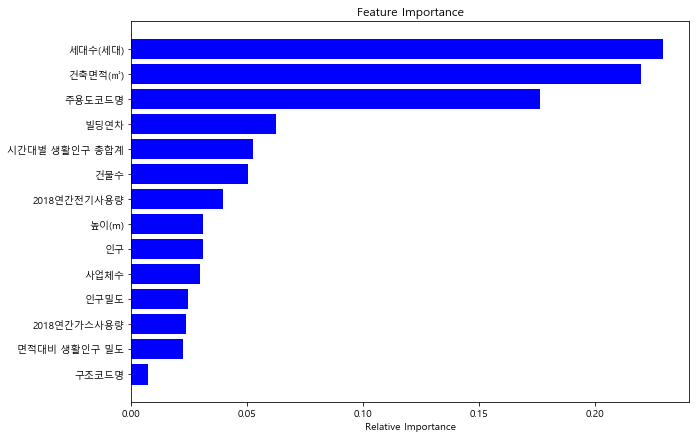

In [217]:
importances = rf2.feature_importances_
indices = np.argsort(importances)
features = X2.columns
plt.figure(figsize=(10,7))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [219]:
feature_df = pd.DataFrame(features,columns=["features"])
importances_df = pd.DataFrame(importances,columns = ["importances"])

importance_df2 = pd.concat([feature_df,importances_df],1)
importance_df2.pivot_table(columns="features")

features,2018연간가스사용량,2018연간전기사용량,건물수,건축면적(㎡),구조코드명,높이(m),면적대비 생활인구 밀도,빌딩연차,사업체수,세대수(세대),시간대별 생활인구 총합계,인구,인구밀도,주용도코드명
importances,0.023637,0.039498,0.050341,0.219949,0.007437,0.031103,0.022467,0.062295,0.029465,0.229249,0.052508,0.030857,0.02468,0.176511


### test set 예측

#### 1) 화재강도

In [220]:
test1 = pd.read_csv("건물별_화재강도_test.csv",encoding='utf-8-sig',engine='python').sort_values("관리건축물대장PK").reset_index(drop=True)
X3 = test1.drop(['시군구명','동리명','관리건축물대장PK','시군구명.1','법정동코드2',
                    '공동주택', '공장', '단독주택','연면적(㎡)','대지면적(㎡)','부동산', '동산', '재산피해소계',
       '문화및집회시설', '숙박시설', '업무시설', '위험물저장및처리시설', '제1종근린생활시설', '제2종근린생활시설',
       '창고시설', '면적', '휴게음식점', '일반음식점', '제과점', '단란주점', '유흥주점','구조코드명','RN_COUNT','주용도코드명',
       '숙박 및 음식점업 사업체수','승용승강기수','비상용승강기수','가판대_count','장소중분류','사업체수','건물수','기타용도',
                 'RN_COUNT_under4','RN_COUNT_under3','RN_COUNT_under2','건물구조즙'],1)
X3.fillna(0,inplace=True)

In [221]:
X3['건물구조조'] = encoder1.fit_transform(X3[['건물구조조']])
X3['장소소분류'] = encoder2.fit_transform(X3[['장소소분류']])

c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [222]:
final_pred = rf1.predict(X3)

In [223]:
final_pred = final_pred*0.9

In [224]:
final_intense_list = []
for value in final_pred:
    z_value = (value-final_pred.min())/(final_pred.max()-final_pred.min())
    final_intense_list.append(z_value*100)

#### 2) 화재 빈도

In [13]:
test2 = pd.read_csv("건물별_화재빈도_test.csv",encoding='utf-8-sig',engine='python').sort_values("관리건축물대장PK").reset_index(drop=True)
X4 = test2.drop(['시군구명','동리명','관리건축물대장PK','법정동코드2',
                    '공동주택', '단독주택', '문화및집회시설', 
        '65세이상인구수','65세이상인구비율', '전체세대수', '0-5 시간대 생활인구', '6-11 시간대 생활인구', '12-17 시간대 생활인구',
       '18-23 시간대 생활인구', '창고시설','숙박시설','제과점','단란주점','유흥주점','휴게음식점','전체평균연령','기타용도',
               '제1종근린생활시설', '제2종근린생활시설','업무시설','일반음식점','공장','위험물저장및처리시설','대지면적(㎡)',
                   '연면적(㎡)','지상층수','지하층수','가구수(가구)'],1)

In [ ]:
encoder = LabelEncoder()
X4['구조코드명'] = encoder3.fit_transform(X4[['구조코드명']])
X4['주용도코드명'] = encoder4.fit_transform(X4[['주용도코드명']])

In [227]:
pred_proba = rf2.predict_proba(X4)

In [228]:
final_count_list = []
for i in pred_proba:
    value = i[1]
    final_count_list.append(value*100)

#### 화재빈도 + 화재강도 위험도 점수계산

In [229]:
final_grade = []
for i in range(len(final_count_list)):
    count = final_count_list[i]
    intense = final_intense_list[i]
    value = np.sqrt(count*intense)
    final_grade.append(value)

In [230]:
final = pd.concat([test1,test2[['면적대비 생활인구 밀도',
       '2018연간가스사용량', '2018연간전기사용량', '0-5 시간대 생활인구', '6-11 시간대 생활인구',
       '12-17 시간대 생활인구', '18-23 시간대 생활인구', '시간대별 생활인구 총합계', '전체세대수', '인구',
       '인구밀도', '전체평균연령', '65세이상인구수', '65세이상인구비율']]],1)

pred_value = pd.concat([pd.DataFrame(final_pred,columns=['피해규모예측']),pd.DataFrame(final_count_list,columns=['화재발생예측'])],1)
final = pd.concat([final,pred_value],1)
final = pd.concat([final,pd.DataFrame(final_grade)],1)
final = final.rename(columns={0:"grade"})

In [231]:
final['grade'].describe()

count    300.000000
mean      41.651521
std       15.287817
min        0.000000
25%       29.795490
50%       39.903574
75%       52.910334
max       89.312304
Name: grade, dtype: float64

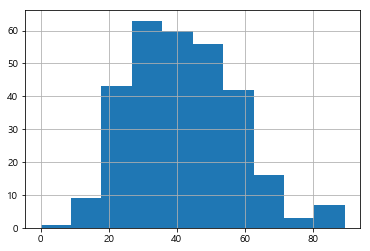

In [232]:
final['grade'].hist()

In [262]:
final['grade2'] = final['grade'].map(lambda x: 1 if x>=70 else
                   2 if x>=55 else
                   3 if x>=40 else
                   4 if x>=25 else 5)

In [263]:
final['grade2'].value_counts()

4    114
3     92
2     46
5     36
1     12
Name: grade2, dtype: int64

In [ ]:
final.groupby(["grade2"]).mean()[['피해규모예측','화재발생예측']]

In [260]:
final.groupby(["grade2"]).mean()

,법정동코드2,대지면적(㎡),건축면적(㎡),연면적(㎡),높이(m),지상층수,지하층수,승용승강기수,비상용승강기수,빌딩연차,공동주택,공장,단독주택,문화및집회시설,숙박시설,업무시설,위험물저장및처리시설,제1종근린생활시설,제2종근린생활시설,창고시설,면적,휴게음식점,일반음식점,제과점,단란주점,유흥주점,사업체수,숙박 및 음식점업 사업체수,RN_COUNT,RN_COUNT_under4,ROAD_BT_MEAN,RN_length_under4,RN_length_under3,RN_COUNT_under3,RN_length_under2,RN_COUNT_under2,RN_under4_rate,RN_under3_rate,RN_under2_rate,비상소화장치_count,소화용수_count,가판대_count,공영주차장수,주차 면(주차 가능 차량 수),건물수,소방서거리(㎞),안전센터거리,부동산,동산,재산피해소계,관할인구(명),관할면적(km2),면적대비 생활인구 밀도,2018연간가스사용량,2018연간전기사용량,0-5 시간대 생활인구,6-11 시간대 생활인구,12-17 시간대 생활인구,18-23 시간대 생활인구,시간대별 생활인구 총합계,전체세대수,인구,인구밀도,전체평균연령,65세이상인구수,65세이상인구비율,피해규모예측,화재발생예측,grade
grade2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.151886e+09,2728.666667,873.075833,5577.250833,29.187500,11.083333,0.833333,0.833333,0.250000,20.250000,899.669444,8.430556,1901.508333,2.130556,8.980556,38.155556,4.722222,305.277778,264.136111,9.294444,2.247944,60.097222,223.766667,8.180556,4.111111,3.619444,1647.350000,261.316667,408.738889,101.455556,7.438698,1002.880112,1157.773336,50.250000,840.525369,12.975000,0.196700,0.109990,0.030348,6.822222,350.433333,2.888889,5.713889,77.731614,3496.280556,5.958333,2.416667,47.500000,158.333333,205.833333,104842.333333,7.201667,6.516143e+06,2.067040e+08,1.774039e+08,5.895472e+07,5.838611e+07,5.716528e+07,5.760917e+07,2.321722e+08,11022.175000,27152.338889,18700.536111,41.875278,3794.886111,0.182498,391.578534,76.357269,79.381498
2,1.144580e+09,531.413671,437.577342,4754.859494,20.534304,7.341772,1.025316,0.645570,0.291139,20.379747,1440.523277,45.144163,4080.821941,3.631821,27.455731,70.098347,5.387307,559.127286,504.158509,12.993917,1.683030,70.535296,300.678487,8.559398,8.145921,6.166782,2020.312550,329.932342,859.880169,337.624402,5.215051,793.554331,723.533989,186.005098,612.433986,59.281364,0.357932,0.172611,0.054156,18.191702,556.339030,5.842124,8.518952,69.791145,6851.690120,3.789873,1.613924,72.101266,139.987342,212.088608,103408.696203,5.933418,9.080431e+06,2.282121e+08,2.074051e+08,5.936939e+07,5.821948e+07,5.759747e+07,5.897744e+07,2.342150e+08,12020.588851,27001.716443,25737.065139,42.861205,3940.315452,0.154565,267.300398,66.462715,57.002040
3,1.146007e+09,840.451805,422.605414,5946.360977,15.903985,7.323308,1.142857,0.646617,0.180451,22.586466,1121.744744,20.102338,2429.036232,3.659239,14.717093,82.208718,5.781813,415.147988,393.895633,9.930048,1.418177,89.135849,331.505105,10.581708,7.122419,4.668649,2355.314141,365.934327,516.335314,181.367384,5.466706,764.870016,728.414453,82.067386,1208.462868,21.733908,0.330692,0.142099,0.037672,16.209586,521.199849,5.593776,6.871136,79.021597,4489.853956,3.121053,1.676692,82.916031,110.885496,190.887218,103758.533835,5.608797,9.087870e+06,2.612102e+08,2.702232e+08,5.835642e+07,6.154900e+07,6.422084e+07,6.079753e+07,2.449329e+08,11021.629829,25621.733937,24302.157712,42.297578,3496.698366,0.139832,181.800955,59.778850,39.485206
4,1.148106e+09,338.996486,209.633108,1832.396486,13.544459,5.608108,0.770270,0.189189,0.108108,23.135135,1962.818533,16.553196,2936.511234,3.830143,41.250912,106.423906,6.322662,550.663047,496.880657,11.316281,1.309169,106.911658,438.899421,12.757390,12.472726,10.743275,2837.180309,483.142460,623.411277,228.936642,5.074656,225.469099,237.864965,92.710854,336.837932,25.384116,0.352727,0.143572,0.035504,16.417471,633.843308,6.578990,10.620817,90.482744,6110.137656,3.301351,1.708108,61.148649,103.878378,165.027027,105772.743243,4.688243,1.051090e+07,2.563261e+08,2.928001e+08,6.478210e+07,6.700511e+07,7.147100e+07,6.944484e+07,2.727799e+08,12136.303335,28150.789629,28023.050139,42.262420,3742.106027,0.137812,120.498338,57.231025,24.031497
5,1.151510e+09,161.000000,275.970000,3271.670000,34.000000,12.500000,0.000000,0.000000,1.000000,13.000000,3379.718750,4.406250,3776.593750,2.468750,63.000000,67.062500,4.906250,641.843750,534.031250,8.250000,1.026667,44.750000,251.708333,7.479167,12.375000,6.958333,1443.437500,254.083333,778.250000,302.468750,4.569280,54.463290,41.7

In [238]:
final.to_csv("final_result/final_grading.csv",encoding='utf-8-sig',index=False)

In [247]:
final.groupby(["grade2"]).mean().reset_index().to_csv("final_result/grade_mean.csv",encoding='utf-8-sig',index=False)

------------

In [84]:
data1 = pd.read_csv("final_result/final_grading.csv")

In [85]:
data2 = pd.read_csv("건물별_화재빈도_test.csv",engine='python',encoding='utf-8-sig')

In [86]:
len(data3)

300

In [87]:
data3 = pd.merge(data1,data2,on='관리건축물대장PK')

In [91]:
data3.groupby('grade2').mean()[['세대수(세대)']]

,세대수(세대)
grade2,
1,60.166667
2,47.630435
3,47.597826
4,33.166667
5,21.250000
